## Classifying newswires: a multiclass classification example

뉴스를 토픽별로 분류하는 문제

* Now, we know how to classify vector inputs into two mutually exclusive classes using a densely connected neural networks.
* Here, we will build a network to classify Reuters newswires into 46 mutually exclusive topics.
* Since we have many classes, this problem is an instance of *multi-class classification*.
* *single-label, multiclass classification* VS *multilabel, multiclass classification*

multi-class classification은 2가지가 있는데<br>
* 하나의 그룹에만 속한 single label
* 여러개의 그룹에 속한 multi label
<br> 지금은 전자다


> ### The Reuters dataset

* A set of short newswires and their topics, published by Reuters in 1986

In [1]:
from tensorflow.keras.datasets import reuters

# Like IMDB, the argument num_words restricts the data to 
# the 10,000 most frequently occurring words 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

In [8]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [9]:
len(train_labels)

8982

> ### Preparing the data

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train.shape

(8982, 10000)

* To vectorize the labels, we can use one-hot encoding.
* One-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

In [12]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
train_labels[100]

20

In [14]:
one_hot_train_labels[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

방금전처럼 함수를 만들어서 원리를 파악했지만 keras.utils 안에 to_categorical이라는 함수가 구현되어있는데 이게 one-hot encoding이랑 같다.

> ### Building the network

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

* `softmax` activation in the last layer
  * The network will ouput a *probability distribution* over the 46 classes.
  * For every input sample, the network will produce a 46-dimensional output vector, where `output[i]` is the probability that the sample belongs to class `i`.
  * The sum of `output[i]` for all `i` will be 1.
  
* `categorical_crossentropy` loss
  * It measures the distance between two probability distributions.
  * Here, between the probability distribution output by the network and the true distribution of the labels

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

> ### Validation

* Use 1,000 samples in the training data as a validation set.

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 30ms/step - loss: 2.6389 - accuracy: 0.4719 - val_loss: 1.7710 - val_accuracy: 0.5900
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4537 - accuracy: 0.6978 - val_loss: 1.3339 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0684 - accuracy: 0.7704 - val_loss: 1.1327 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8305 - accuracy: 0.8216 - val_loss: 1.0503 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6576 - accuracy: 0.8642 - val_loss: 0.9720 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5275 - accuracy: 0.8913 - val_loss: 0.9181 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4223 - accuracy: 0.9132 - val_loss: 0.8939 - val_accuracy: 0.8200
Epoch 8/20
16

* Plotting the training and validation loss

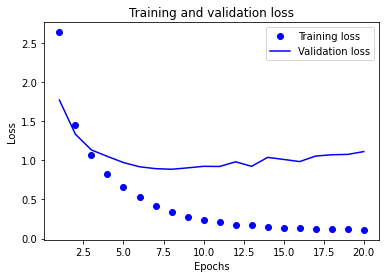

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

* Plotting the training and validation accuracy

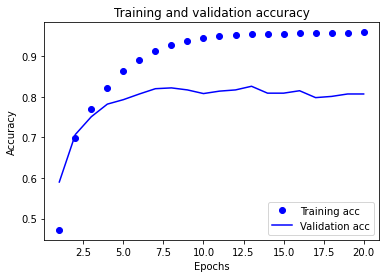

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

* We can observe that the network begins to overfit after nine epochs.
* Retraining a model from scratch

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val)) 

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 28ms/step - loss: 2.5016 - accuracy: 0.5207 - val_loss: 1.6280 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.3505 - accuracy: 0.7096 - val_loss: 1.2861 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0238 - accuracy: 0.7805 - val_loss: 1.1282 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8147 - accuracy: 0.8269 - val_loss: 1.0367 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6560 - accuracy: 0.8613 - val_loss: 0.9842 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5257 - accuracy: 0.8885 - val_loss: 0.9339 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4239 - accuracy: 0.9075 - val_loss: 0.9057 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [23]:
print(results)

[1.015444278717041, 0.7796081900596619]


* Retraining a model from scratch is not a good idea if we have a large-scale training set.
* In this case, we can use `callbacks` functionality in `keras`.
  * https://keras.io/callbacks/
  
* Before, we need to mount Google Drive storage with our colab instance.

만약에 데이터 수가 너무 많아서 epoch을 엄청 많이 해야하는 경우가 온다면 어떻게 해야할까?<br>
==> epoch를 할때마다의 모델을 저장을 해서 test를 할때 그냥 그 모델을 불러오면 긴시간의 training 시간을 줄일 수 있을것이다.<br>
그것에 대해 알아보자 keras에는 그 기능이 callback이라고 구현이 되어있다.<br>
keras callback은 어떤 특정 조건에 도달이 되면 내부적으로 자동적으로 실행되는 함수다.

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
%cd /content/gdrive

/content/gdrive


In [26]:
!ls

MyDrive


In [27]:
%cd 'My Drive'/exp

/content/gdrive/My Drive/exp


In [28]:
!pwd

/content/gdrive/My Drive/exp


In [29]:
!ls

model.01.hdf5  model.05.hdf5  model.09.hdf5  model.13.hdf5  model.17.hdf5
model.02.hdf5  model.06.hdf5  model.10.hdf5  model.14.hdf5  model.18.hdf5
model.03.hdf5  model.07.hdf5  model.11.hdf5  model.15.hdf5  model.19.hdf5
model.04.hdf5  model.08.hdf5  model.12.hdf5  model.16.hdf5  model.20.hdf5


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/exp/model.{epoch:02d}.hdf5'
modelckpt = ModelCheckpoint(filepath=filepath)

model.fit(partial_x_train, 
          partial_y_train, 
          epochs=20, 
          batch_size=512, 
          validation_data=(x_val, y_val),
          callbacks=[modelckpt]) 

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 0s 27ms/step - loss: 0.2442 - accuracy: 0.9442 - val_loss: 0.9307 - val_accuracy: 0.8140
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 0.2146 - accuracy: 0.9471 - val_loss: 0.9717 - val_accuracy: 0.8140
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 0.1854 - accuracy: 0.9508 - val_loss: 0.9445 - val_accuracy: 0.8220
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.1722 - accuracy: 0.9528 - val_loss: 0.9456 - val_accuracy: 0.8130
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1544 - accuracy: 0.9554 - val_loss: 0.9877 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.1403 - accuracy: 0.9560 - val_loss: 1.0283 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.1358 - accuracy: 0.9548 - val_loss: 1.0251 - val_accuracy: 0.8040
Epoch 8/20
16

이 코드가 끝나니 google drive안에 exp의 폴더에 epoch마다의 모델이 저장되어있다. <br>만약에 training을 하다가 중간에 끊기고 막 다시해야하면 거기서 불러서 하면 된다<br>
혹은 이 epoch일때 가장 accuracy가 높으면 그때의 epoch를 불러와서 하면 된다<br>
다음 코드에 중간에 부르는 과정을 보여준다

* Load the trained model at epoch 9

In [30]:
best_model_path = '/content/gdrive/My Drive/exp/model.09.hdf5'
best_model = models.load_model(best_model_path)

내 컴에서는 error가 안뜨는데 만약 불러와서 계속 학습을 시킬거면 힘들다라고 말씀하신다.<br>
왜냐면 optimizier까지 다 불러오는것이 아니라고 한다=>나중에 그럴일이 있으면 다시 보자 5주차 2차시 강의 25분

In [31]:
results = best_model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 3ms/step - loss: 1.1921 - accuracy: 0.7894
[1.1920591592788696, 0.7894033789634705]


> ### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions.shape

(2246, 46)

In [ ]:
predictions[0]

array([1.54074044e-07, 1.96626686e-07, 2.30905513e-07, 9.73767877e-01,
       2.52598077e-02, 4.15778745e-10, 8.78314523e-08, 2.64474931e-08,
       2.48703327e-05, 5.27819623e-07, 2.52233463e-07, 3.95415373e-06,
       3.55411856e-07, 4.10849407e-06, 3.10653614e-09, 5.26122435e-09,
       6.07079983e-07, 1.16041939e-07, 4.92792918e-09, 4.51280590e-04,
       4.70857514e-04, 4.03536615e-06, 2.11422915e-07, 1.01232118e-07,
       5.78405901e-09, 2.05619628e-08, 4.38064385e-12, 1.11331211e-09,
       7.33729024e-08, 2.43564637e-06, 5.11041698e-08, 3.74309224e-08,
       4.56202756e-08, 4.60327609e-11, 1.30818449e-07, 1.14385955e-06,
       6.24907807e-06, 2.20031193e-08, 7.30125862e-08, 1.17282006e-07,
       5.82586646e-09, 8.62858407e-09, 2.18489689e-08, 3.45451068e-09,
       1.44248437e-13, 8.87936669e-10], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[])

3

> ### A different way to handle the labels and the loss

one hot encoding이 아닌 그냥 숫자로 되어있을때도 모델을 돌릴수 있다는데<br>
loss함수를 잘 살펴보자

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

> ### The importance of having sufficiently large hidden layers

이건 중간에 만약 hidden node를 4로 만들면 어떻게 되나에 대해서 성능을 보여주는데 그냥 별로라는것을 보여주고 최적의 파라미터를 구하기위해서는 한땀한땀 하나씩 알아봐야한다는 것을 보여준다

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.2018 - accuracy: 0.2258 - val_loss: 2.6608 - val_accuracy: 0.2770
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 2.0923 - accuracy: 0.4570 - val_loss: 1.7046 - val_accuracy: 0.6390
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3790 - accuracy: 0.6567 - val_loss: 1.4224 - val_accuracy: 0.6500
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1530 - accuracy: 0.6943 - val_loss: 1.3435 - val_accuracy: 0.6780
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0111 - accuracy: 0.7374 - val_loss: 1.2956 - val_accuracy: 0.7000
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9063 - accuracy: 0.7740 - val_loss: 1.2790 - val_accuracy: 0.7050
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8244 - accuracy: 0.7912 - val_loss: 1.2884 - val_accuracy: 0.7220
Epoch 8/20
63/63 [=